In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [49]:
from sklearn import model_selection

class TestPerformance:
    
    def cross_validation(self, model, X, y, scoring, n=10, if_print=True):
        """
        model: sklearn model, e.g.from sklearn.linear_model import LogisticRegression, from sklearn.naive_bayes import GaussianNB, from sklearn.neighbors import KNeighborsClassifier
        scoring: measure method
            Classification: 'accuracy', 'average_precision', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'neg_log_loss',  'normalized_mutual_info_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc'
            Clustering: 'adjusted_mutual_info_score', 'adjusted_rand_score', 'completeness_score','fowlkes_mallows_score', 'homogeneity_score', 'mutual_info_score', 'v_measure_score'
            Regression: 'explained_variance', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'r2', 
        """
        name = type(model).__name__
        kfold = model_selection.KFold(n_splits=n)
        cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
        if if_print:
            print('Model: ' + name + ';', ' Measurement: ' + scoring + '; ', str(n) + '-fold')
            print('Mean = ' + str(cv_results.mean()) + '; ', 'Standard error = ' + str(cv_results.std()))
        return cv_results
    
    def compare_models_cross_validation(self, models, X, y, scoring, n=10):
        """
        model: list of sklearn models
        """
        results = []
        names = []
        for model in models:
            name = type(model).__name__
            cv_results = self.cross_validation(model, X, y, scoring=scoring, if_print=False)
            results.append(cv_results)
            names.append(name)
            
        # boxplot algorithm comparison
        fig = plt.figure(figsize=(10,6))
        ax = fig.add_subplot(111)
        plt.boxplot(results)
        fig.suptitle('Algorithm Comparison by ' + scoring + ', ' + str(n) + '-fold')
        ax.set_xticklabels(names,rotation=25)
        plt.show()

## Sample

In [15]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = pd.read_csv(url, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
dataframe

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [30]:
from sklearn.linear_model import LogisticRegression
tp = TestPerformance()
tp.cross_validation(LogisticRegression(), X, Y, scoring='f1')

Model: LogisticRegression;  Measurement: f1;  10-fold
Mean = 0.6184556282032675;  Standard error = 0.05406914755072877


array([0.61016949, 0.61111111, 0.65517241, 0.59259259, 0.62222222,
       0.6122449 , 0.62068966, 0.66666667, 0.48780488, 0.70588235])

In [31]:
from sklearn.linear_model import LinearRegression
tp.cross_validation(LinearRegression(), X[:,0:7], X[:,7], scoring='neg_mean_squared_error')

Model: LinearRegression;  Measurement: neg_mean_squared_error;  10-fold
Mean = -89.26715742015062;  Standard error = 16.813872038056942


array([ -94.47901205,  -83.32201958,  -66.44145779,  -69.90570068,
        -85.59148969, -116.48303287, -121.52694024,  -84.62115976,
        -82.12653604,  -88.17422551])

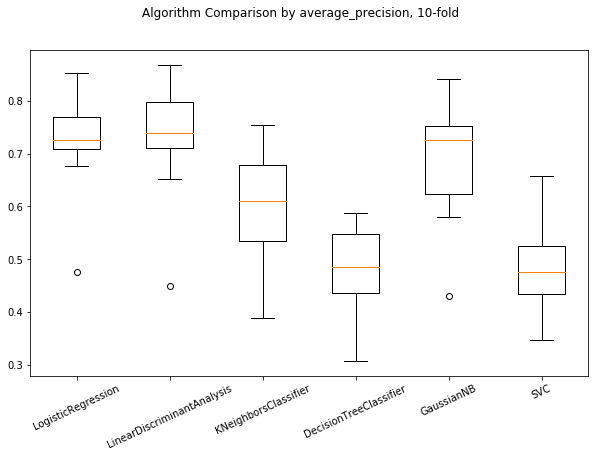

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

models = [LogisticRegression(), LinearDiscriminantAnalysis(), KNeighborsClassifier(), DecisionTreeClassifier(),GaussianNB(), SVC()]

tp = TestPerformance()
tp.compare_models_cross_validation(models, X, Y, scoring='average_precision', n=10)

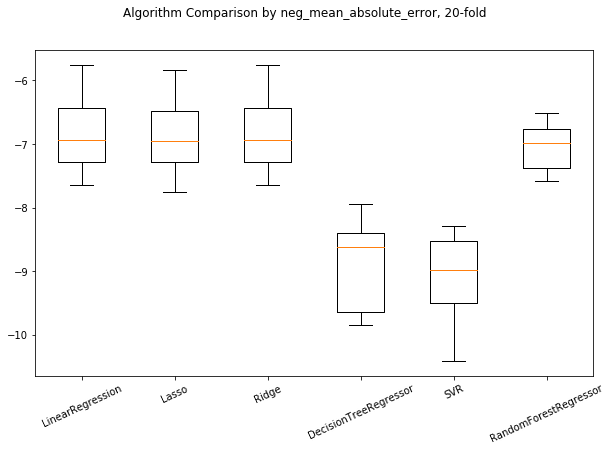

In [53]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

models = [LinearRegression(), Lasso(), Ridge(), DecisionTreeRegressor(), SVR(),RandomForestRegressor()]

tp = TestPerformance()
tp.compare_models_cross_validation(models, X[:, 0:7], X[:, 7], scoring='neg_mean_absolute_error', n=20)

In [61]:
data = pd.read_csv('airbnb.csv')
data.dropna(inplace=True)
data = data[data['city']=='NYC']

In [62]:
data['HIGH'] = (data['log_price'] >= data['log_price'].mean()).astype('int')

In [63]:
X = data[['bedrooms', 'bathrooms', 'review_scores_rating', 'accommodates']]
Y1 = data['log_price']
Y2 = data['HIGH']

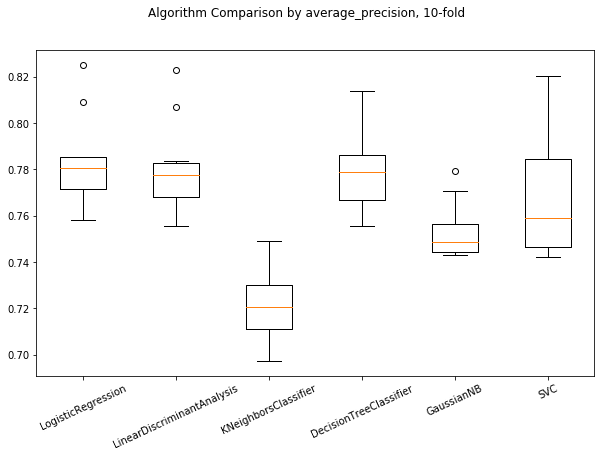

In [64]:
models = [LogisticRegression(), LinearDiscriminantAnalysis(), KNeighborsClassifier(), DecisionTreeClassifier(),GaussianNB(), SVC()]

tp = TestPerformance()
tp.compare_models_cross_validation(models, X, Y2, scoring='average_precision', n=10)

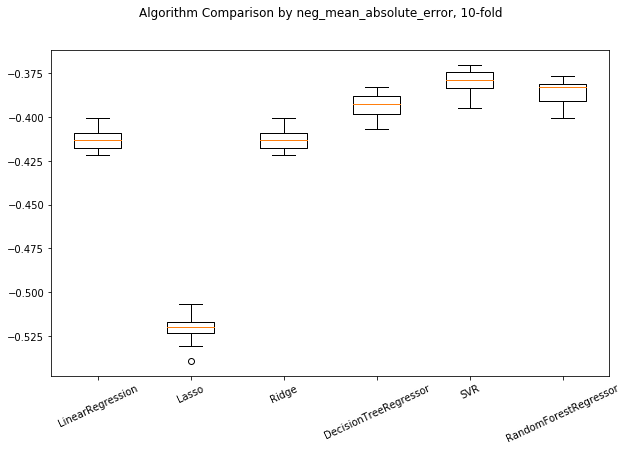

In [65]:
models = [LinearRegression(), Lasso(), Ridge(), DecisionTreeRegressor(), SVR(),RandomForestRegressor()]

tp = TestPerformance()
tp.compare_models_cross_validation(models, X, Y1, scoring='neg_mean_absolute_error', n=10)